In [1]:
import sys
sys.path.append('/media/xreco/DEV/xiran/code/user_item_lightgcn')

In [20]:
from utils.utils import ensure_dir

In [2]:
import numpy as np
from matplotlib import pyplot as plt
from brokenaxes import brokenaxes
import os.path as osp

In [3]:
def get_scores(dataset, record_file):
    X = np.loadtxt(osp.join(dataset, record_file), delimiter=',', skiprows=1)
    r100 = X[:, 8]
    return r100

In [4]:
def set_axis_font_density(ax, size=14):
    ax.tick_params(labelsize=size)
    labels = ax.get_xticklabels() + ax.get_yticklabels()
    for label in labels:
        label.set_fontname('Times New Roman')

In [27]:
# dataset = 'pokec'
# dataset = 'livejournal'
dataset = 'xbox'
y_dnn = get_scores(dataset, 'record_dnn.txt')
y_pprgo = get_scores(dataset, 'record_pprgo.txt')
y_lightgcn = get_scores(dataset, 'record_lightgcn.txt')

In [28]:
epochs = np.arange(1, 200)

In [29]:
time_dict = {
    'pokec': {
        'dnn': 13.6,
        'pprgo': 51.3,
        'lightgcn': 440.5,
    },
    'livejournal': {
        'dnn': 35.7,
        'pprgo': 244.9,
        'lightgcn': 1615.23,
    },
    'xbox': {
        'dnn': 50.3,
        'pprgo': 417.4,
        'lightgcn': 706.10,
    }
    
    # 'pokec': {
    #     'dnn': 35.35,
    #     'pprgo': 110.73,
    #     'lightgcn': 452.46,
    # },
    # 'livejournal': {
    #     'dnn': 103.52,
    #     'pprgo': 617.59,
    #     'lightgcn': 1615.23,
    # },
    # 'xbox': {
    #     'dnn': 393,
    #     'pprgo': 2438,
    #     'lightgcn': 2642,
    # }
}
dnn_time_per_epoch = time_dict[dataset]['dnn']
pprgo_time_per_epoch = time_dict[dataset]['pprgo']
lightgcn_time_per_epoch = time_dict[dataset]['lightgcn']

x_epochs = np.arange(1, 200)
x_time_pprgo = x_epochs * pprgo_time_per_epoch
x_time_dnn = x_epochs * dnn_time_per_epoch
x_time_lightgcn = x_epochs * lightgcn_time_per_epoch

In [30]:
color_dnn = '#FF2442'
color_pprgo = '#55D8C1'
color_lightgcn = '#FFD24C'

font_legend = {
    'family': 'Times New Roman',
    'weight': 'normal',
    'size': 20,
}
font_axis_label = {
    'family': 'Times New Roman',
    'weight': 'normal',
    'size': 26.5,
}
linewidth = 2

110 100 100


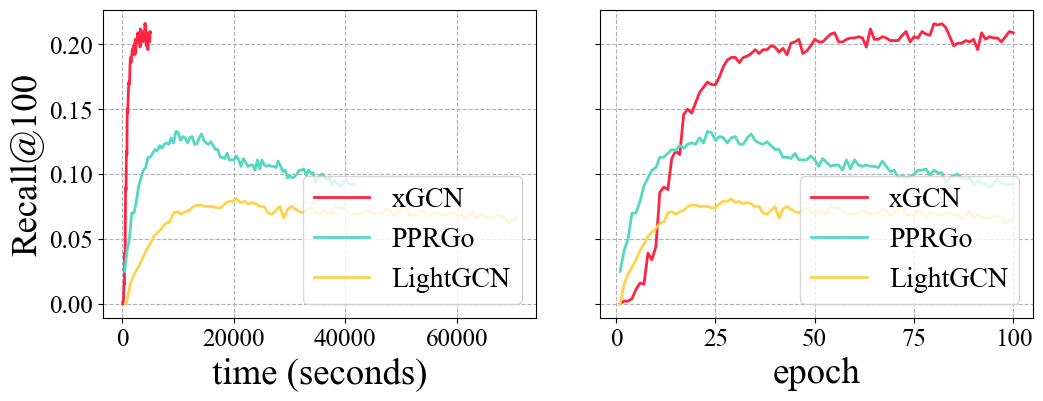

In [31]:
_y_pprgo = y_pprgo[:100]
_y_lightgcn = y_lightgcn[:100]
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4), sharey=True) #, figsize=(16, 4), sharey=False)

plt.subplots_adjust(
#     left=0.125,
#     bottom=0.1, 
#     right=0.9, 
#     top=0.9, 
    wspace=0.15,
    hspace=0.3,
)

ax0, ax1 = axes

ax1.plot(x_epochs[:100], y_dnn[:100], color=color_dnn, label='xGCN', linewidth=linewidth)
ax1.plot(x_epochs[:100], _y_pprgo[:100], color=color_pprgo, label='PPRGo', linewidth=linewidth)
ax1.plot(x_epochs[:100], _y_lightgcn[:100], color=color_lightgcn, label='LightGCN', linewidth=linewidth)
ax1.grid(ls='--')

# ax1.set_ylabel('Recall@100', font_axis_label)
ax1.set_xlabel('epoch', font_axis_label)
set_axis_font_density(ax1, 18)

# ax0.legend(prop=font_legend, frameon=True, ncol=2, 
#            bbox_to_anchor=(0.6, 1.0)
# )
ax1.legend(prop=font_legend, loc='lower right')

# ax0.plot(x_time_dnn[:len(y_dnn)], y_dnn, color=color_dnn, label='xGCN', linewidth=linewidth)
# ax0.plot(x_time_pprgo[:len(_y_pprgo)], _y_pprgo, color=color_pprgo, label='PPRGo', linewidth=linewidth)
# ax0.plot(x_time_lightgcn[:len(_y_lightgcn[:])], _y_lightgcn[:], color=color_lightgcn, label='LightGCN', linewidth=linewidth)

print(len(y_dnn), len(_y_pprgo), len(_y_lightgcn))

ax0.plot(x_time_dnn[:100], y_dnn[:100], color=color_dnn, label='xGCN', linewidth=linewidth)
ax0.plot(x_time_pprgo[:100], _y_pprgo[:100], color=color_pprgo, label='PPRGo', linewidth=linewidth)
ax0.plot(x_time_lightgcn[:100], _y_lightgcn[:100], color=color_lightgcn, label='LightGCN', linewidth=linewidth)

ax0.grid(ls='--')

ax0.set_ylabel('Recall@100', font_axis_label)
ax0.set_xlabel('time (seconds)', font_axis_label)
set_axis_font_density(ax0, 18)

ax0.legend(prop=font_legend, loc='lower right')

save_root='/media/xreco/DEV/xiran/data/social_and_user_item/model_outputs/figure-www23/efficiency'
ensure_dir(save_root)

plt.savefig(osp.join(save_root, dataset + ".pdf"), bbox_inches='tight')
plt.show()